<a href="https://colab.research.google.com/github/Rabin-kar/machine_learning_projects/blob/main/NIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NSK-KDD.csv')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df.shape

(125973, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
attack_n = []
for i in df.attack:
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n


df['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])
df['attack'] = label_encoder.fit_transform(df['attack'])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21


In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
spearmancorr = df.corr(method='spearman')
spearmancorr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
duration,1.000000,0.102633,0.175985,0.108622,0.226291,0.148965,-0.004137,-0.027431,0.029670,0.229317,...,-0.140463,0.196305,0.182188,-0.026576,-0.155844,-0.153096,0.065198,0.068988,0.150294,-0.007801
protocol_type,0.102633,1.000000,-0.008136,0.108251,-0.043796,0.144115,-0.001925,0.132616,-0.001155,-0.020107,...,-0.058025,0.121959,-0.153127,-0.276658,-0.087200,-0.093292,-0.015714,-0.058031,0.280603,0.059851
service,0.175985,-0.008136,1.000000,-0.296813,-0.164606,-0.098029,-0.013410,0.058186,0.011534,-0.069515,...,-0.364479,0.370896,-0.148002,-0.160621,0.263705,0.241803,0.131389,0.133796,-0.205439,0.141767
flag,0.108622,0.108251,-0.296813,1.000000,0.821572,0.663767,-0.013352,0.074029,0.006698,0.087886,...,0.658147,-0.584985,0.398270,0.348271,-0.561874,-0.533780,-0.479927,-0.541772,0.704308,0.210519
src_bytes,0.226291,-0.043796,-0.164606,0.821572,1.000000,0.700429,-0.015303,0.015838,0.007788,0.204360,...,0.617328,-0.525421,0.377113,0.343913,-0.624123,-0.608692,-0.229499,-0.259287,0.710705,0.279581
dst_bytes,0.148965,0.144115,-0.098029,0.663767,0.700429,1.000000,-0.012240,-0.080985,0.013028,0.200109,...,0.667035,-0.624976,0.059245,0.326985,-0.519225,-0.483492,-0.218739,-0.186078,0.751875,0.460200
land,-0.004137,-0.001925,-0.013410,-0.013352,-0.015303,-0.012240,1.000000,-0.001316,-0.000119,-0.002074,...,0.012721,-0.011337,0.022820,0.021344,0.020113,0.017276,-0.003990,-0.005985,-0.007192,-0.017334
wrong_fragment,-0.027431,0.132616,0.058186,0.074029,0.015838,-0.080985,-0.001316,1.000000,-0.000790,-0.013750,...,-0.020433,0.032046,0.109533,-0.036588,-0.016911,-0.063799,0.038359,-0.039685,-0.100137,-0.146609
urgent,0.029670,-0.001155,0.011534,0.006698,0.007788,0.013028,-0.000119,-0.000790,1.000000,0.017955,...,-0.004588,0.002348,0.004121,-0.000385,-0.004700,-0.005772,-0.003950,-0.003591,0.002238,-0.007989
hot,0.229317,-0.020107,-0.069515,0.087886,0.204360,0.200109,-0.002074,-0.013750,0.017955,1.000000,...,0.063167,-0.060219,-0.001786,-0.066191,-0.063830,-0.070278,0.095381,0.095199,-0.018489,-0.152416


In [ ]:
spearmancorr = df.corr(method='spearman')
spearmancorr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
duration,1.000000,0.102633,0.175985,0.108622,0.226291,0.148965,-0.004137,-0.027431,0.029670,0.229317,...,-0.140463,0.196305,0.182188,-0.026576,-0.155844,-0.153096,0.065198,0.068988,0.150294,-0.007801
protocol_type,0.102633,1.000000,-0.008136,0.108251,-0.043796,0.144115,-0.001925,0.132616,-0.001155,-0.020107,...,-0.058025,0.121959,-0.153127,-0.276658,-0.087200,-0.093292,-0.015714,-0.058031,0.280603,0.059851
service,0.175985,-0.008136,1.000000,-0.296813,-0.164606,-0.098029,-0.013410,0.058186,0.011534,-0.069515,...,-0.364479,0.370896,-0.148002,-0.160621,0.263705,0.241803,0.131389,0.133796,-0.205439,0.141767
flag,0.108622,0.108251,-0.296813,1.000000,0.821572,0.663767,-0.013352,0.074029,0.006698,0.087886,...,0.658147,-0.584985,0.398270,0.348271,-0.561874,-0.533780,-0.479927,-0.541772,0.704308,0.210519
src_bytes,0.226291,-0.043796,-0.164606,0.821572,1.000000,0.700429,-0.015303,0.015838,0.007788,0.204360,...,0.617328,-0.525421,0.377113,0.343913,-0.624123,-0.608692,-0.229499,-0.259287,0.710705,0.279581
dst_bytes,0.148965,0.144115,-0.098029,0.663767,0.700429,1.000000,-0.012240,-0.080985,0.013028,0.200109,...,0.667035,-0.624976,0.059245,0.326985,-0.519225,-0.483492,-0.218739,-0.186078,0.751875,0.460200
land,-0.004137,-0.001925,-0.013410,-0.013352,-0.015303,-0.012240,1.000000,-0.001316,-0.000119,-0.002074,...,0.012721,-0.011337,0.022820,0.021344,0.020113,0.017276,-0.003990,-0.005985,-0.007192,-0.017334
wrong_fragment,-0.027431,0.132616,0.058186,0.074029,0.015838,-0.080985,-0.001316,1.000000,-0.000790,-0.013750,...,-0.020433,0.032046,0.109533,-0.036588,-0.016911,-0.063799,0.038359,-0.039685,-0.100137,-0.146609
urgent,0.029670,-0.001155,0.011534,0.006698,0.007788,0.013028,-0.000119,-0.000790,1.000000,0.017955,...,-0.004588,0.002348,0.004121,-0.000385,-0.004700,-0.005772,-0.003950,-0.003591,0.002238,-0.007989
hot,0.229317,-0.020107,-0.069515,0.087886,0.204360,0.200109,-0.002074,-0.013750,0.017955,1.000000,...,0.063167,-0.060219,-0.001786,-0.066191,-0.063830,-0.070278,0.095381,0.095199,-0.018489,-0.152416


<Axes: >

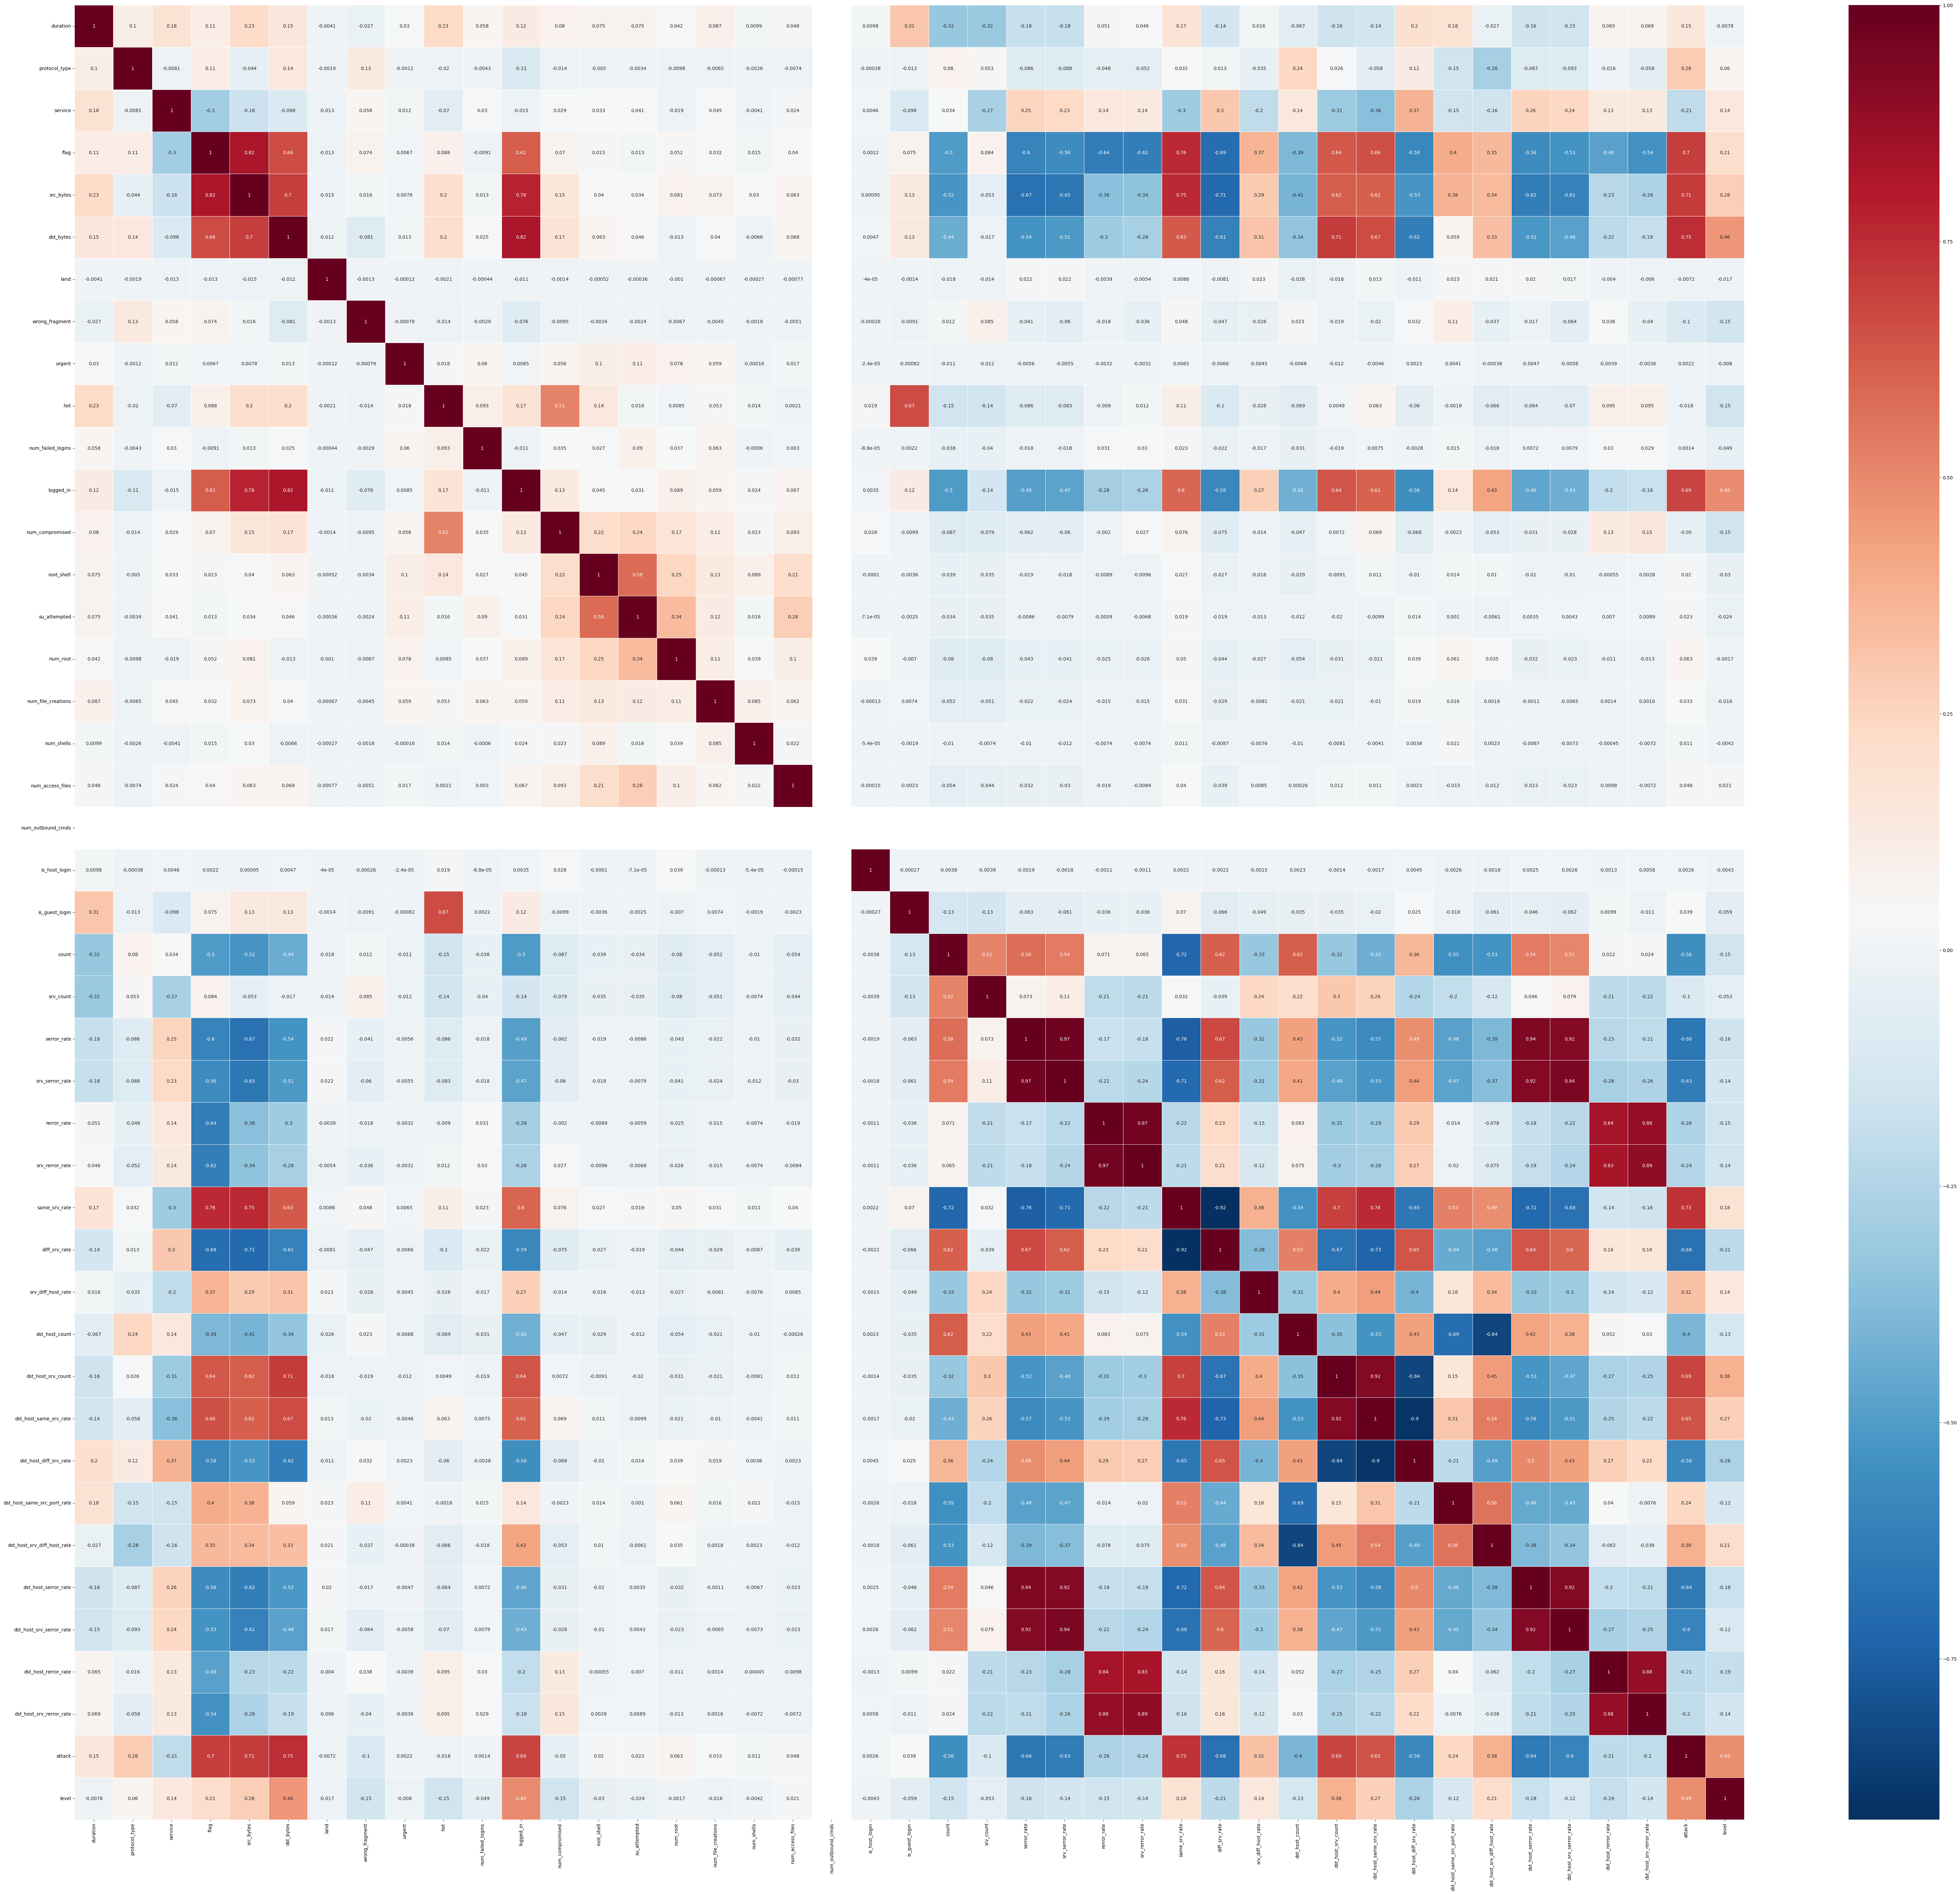

In [ ]:
plt.figure(figsize=(80,70))
sns.heatmap(spearmancorr,xticklabels=spearmancorr.columns,yticklabels=spearmancorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['duration','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell',
             'su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
             'is_guest_login','count','srv_count','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','protocol_type','service', 'attack'], axis=1)
Y = df["attack"]


In [ ]:
X.shape

(125964, 16)

In [ ]:
X.isnull().sum()

flag                        0
src_bytes                   0
dst_bytes                   0
logged_in                   0
serror_rate                 0
srv_serror_rate             0
rerror_rate                 0
srv_rerror_rate             0
same_srv_rate               0
dst_host_srv_count          0
dst_host_same_srv_rate      0
dst_host_serror_rate        0
dst_host_srv_serror_rate    0
dst_host_rerror_rate        0
dst_host_srv_rerror_rate    0
level                       0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X=standardized_data
y=df['attack']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(125964, 16) (100771, 16) (25193, 16)


In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy score on the training data
X_train_predection = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predection, Y_train)

In [ ]:
print("Accuracy score of the training data: ", training_data_accuracy)

Accuracy score of the training data:  0.953488602871858


In [ ]:
#accuracy score on the test data
X_test_predection = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predection, Y_test)

In [ ]:
print("Accuracy score of the test data: ", test_data_accuracy)

Accuracy score of the test data:  0.9523677211923948
